In [2]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [3]:
using DataFrames
using StatsPlots

In [4]:
using Revise
using Newtrinos
using Newtrinos.osc

In [5]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
  [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [6]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All())

In [7]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 5.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=100.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#44"(), Newtrinos.osc.var"#osc_prob#38"{Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [8]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [9]:
experiments = (
 
    dayabay = Newtrinos.dayabay.configure(physics),
);

[ Info: Loading dayabay data


In [10]:
p = Newtrinos.get_params(experiments)

(N = 5.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

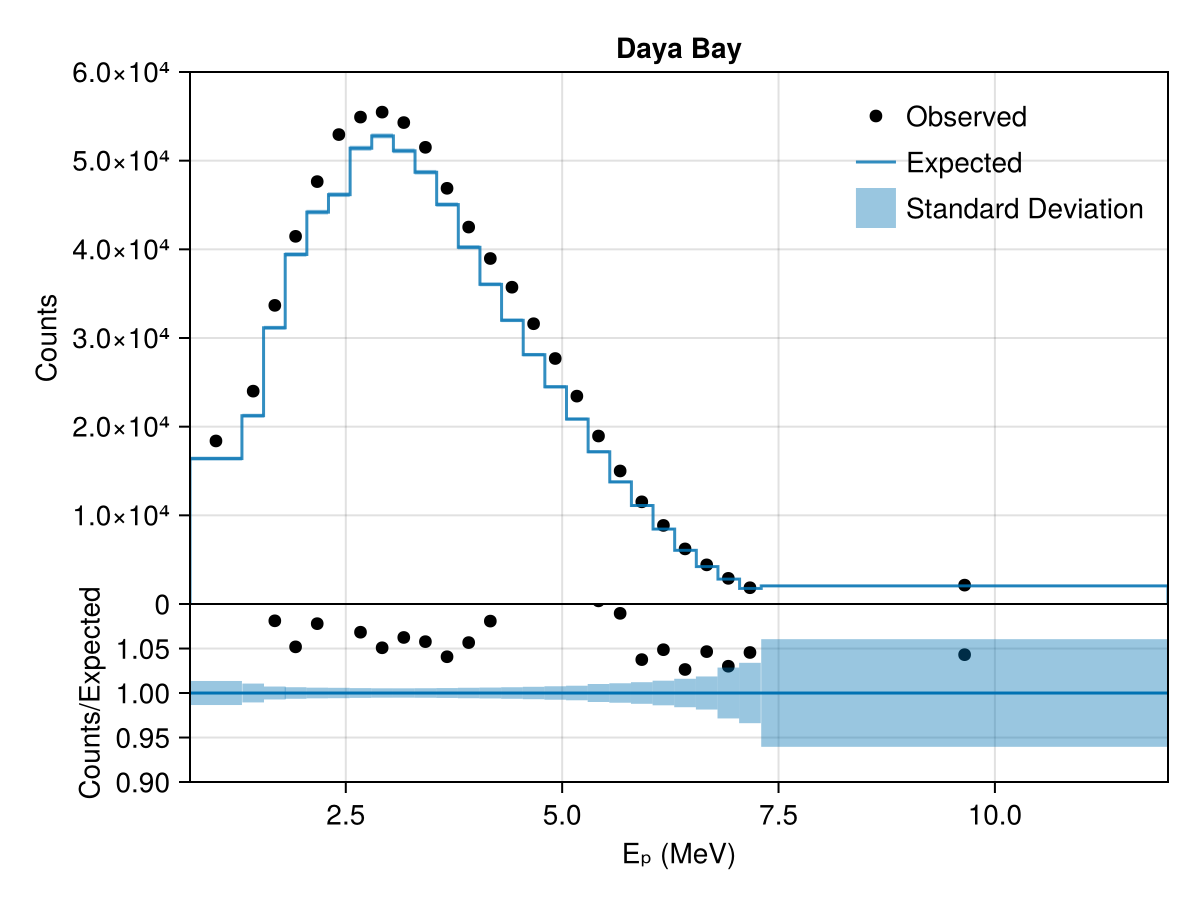

In [11]:
img = experiments.dayabay.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_data_NND_20.png", img)

In [13]:
likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (r=31, N=31), p)

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:08:56

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mGenericMemory[22m
    [90m    @[39m [90m./[39m[90m[4mboot.jl:516[24m[39m[90m [inlined][39m
      [2] [0m[1mnew_as_memoryref[22m
    [90m    @[39m [90m./[39m[90m[4mboot.jl:535[24m[39m[90m [inlined][39m
      [3] [0m[1mArray[22m
    [90m    @[39m [90m./[39m[90m[4mboot.jl:582[24m[39m[90m [inlined][39m
      [4] [0m[1mArray[22m
    [90m    @[39m [90m./[39m[90m[4mboot.jl:592[24m[39m[90m [inlined][39m
      [5] [0m[1mArray[22m
    [90m    @[39m [90m./[39m[90m[4mboot.jl:599[24m[39m[90m [inlined][39m
      [6] [0m[1msimilar[22m
    [90m    @[39m [90m./[39m[90m[4mabstractarray.jl:868[24m[39m[90m [inlined][39m
      [7] [0m[1msimilar[22m
    [90m    @[39m [90m./[39m[90m[4mabstractarray.jl:867[24m[39m[90m [inlined][39m
      [8] [0m[1msimilar[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:224[24m[39m[90m [inlined][39m
      [9] [0m[1msimilar[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:223[24m[39m[90m [inlined][39m
     [10] [0m[1mcopy[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:897[24m[39m[90m [inlined][39m
     [11] [0m[1mmaterialize[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:872[24m[39m[90m [inlined][39m
     [12] [0m[1m(::Newtrinos.osc.var"#21#22"{Matrix{ComplexF64}, Vector{Float64}})[22m[0m[1m([22m[90me[39m::[0mFloat64, [90ml[39m::[0mFloat64[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.osc[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:372[24m[39m
     [13] [0m[1m_broadcast_getindex_evalf[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:678[24m[39m[90m [inlined][39m
     [14] [0m[1m_broadcast_getindex[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:651[24m[39m[90m [inlined][39m
     [15] [0m[1mgetindex[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:610[24m[39m[90m [inlined][39m
     [16] [0m[1mmacro expansion[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:973[24m[39m[90m [inlined][39m
     [17] [0m[1mmacro expansion[22m
    [90m    @[39m [90m./[39m[90m[4msimdloop.jl:77[24m[39m[90m [inlined][39m
     [18] [0m[1mcopyto![22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:972[24m[39m[90m [inlined][39m
     [19] [0m[1mcopyto![22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:925[24m[39m[90m [inlined][39m
     [20] [0m[1mcopy[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:897[24m[39m[90m [inlined][39m
     [21] [0m[1mmaterialize[22m
    [90m    @[39m [90m./[39m[90m[4mbroadcast.jl:872[24m[39m[90m [inlined][39m
     [22] [0m[1mbroadcast[22m[0m[1m([22m::[0mNewtrinos.osc.var"#21#22"[90m{Matrix{ComplexF64}, Vector{Float64}}[39m, ::[0mVector[90m{Float64}[39m, ::[0mAdjoint[90m{Float64, Vector{Float64}}[39m[0m[1m)[22m
    [90m    @[39m [90mBase.Broadcast[39m [90m./[39m[90m[4mbroadcast.jl:810[24m[39m
     [23] [0m[1mpropagate[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:372[24m[39m[90m [inlined][39m
     [24] [0m[1m(::Newtrinos.osc.var"#osc_prob#38"{Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}})[22m[0m[1m([22m[90mE[39m::[0mVector[90m{Float64}[39m, [90mL[39m::[0mVector[90m{Float64}[39m, [90mparams[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m; [90manti[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.osc[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:439[24m[39m
     [25] [0m[1mget_expected_per_period[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m, [90mperiod[39m::[0mInt64, [90mphysics[39m::[0m@NamedTuple[90m{osc::Newtrinos.osc.Osc}[39m, [90massets[39m::[0m@NamedTuple[90m{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}[39m[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.dayabay[39m [90m~/Newtrinos.jl/src/experiments/daya_bay/daya_bay_3158days/[39m[90m[4mdayabay.jl:174[24m[39m
     [26] [0m[1m#8[22m
    [90m    @[39m [90m./[39m[90m[4mgenerator.jl:0[24m[39m[90m [inlined][39m
     [27] [0m[1miterate[22m
    [90m    @[39m [90m./[39m[90m[4mgenerator.jl:48[24m[39m[90m [inlined][39m
     [28] [0m[1mcollect_to![22m[0m[1m([22m[90mdest[39m::[0mVector[90m{Vector{Float64}}[39m, [90mitr[39m::[0mBase.Generator[90m{UnitRange{Int64}, Newtrinos.dayabay.var"#8#9"{@NamedTuple{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}, @NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}[39m, [90moffs[39m::[0mInt64, [90mst[39m::[0mInt64[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4marray.jl:849[24m[39m
     [29] [0m[1mcollect_to_with_first![22m[0m[1m([22m[90mdest[39m::[0mVector[90m{Vector{Float64}}[39m, [90mv1[39m::[0mVector[90m{Float64}[39m, [90mitr[39m::[0mBase.Generator[90m{UnitRange{Int64}, Newtrinos.dayabay.var"#8#9"{@NamedTuple{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}, @NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}[39m, [90mst[39m::[0mInt64[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4marray.jl:827[24m[39m
     [30] [0m[1mcollect[22m[0m[1m([22m[90mitr[39m::[0mBase.Generator[90m{UnitRange{Int64}, Newtrinos.dayabay.var"#8#9"{@NamedTuple{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}, @NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}[39m[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4marray.jl:801[24m[39m
     [31] [0m[1mget_expected[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m, [90mphysics[39m::[0m@NamedTuple[90m{osc::Newtrinos.osc.Osc}[39m, [90massets[39m::[0m@NamedTuple[90m{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}[39m[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.dayabay[39m [90m~/Newtrinos.jl/src/experiments/daya_bay/daya_bay_3158days/[39m[90m[4mdayabay.jl:182[24m[39m
     [32] [0m[1m(::Newtrinos.dayabay.var"#forward_model#10"{@NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}})[22m[0m[1m([22m[90mparams[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m[0m[1m)[22m
    [90m    @[39m [35mNewtrinos.dayabay[39m [90m~/Newtrinos.jl/src/experiments/daya_bay/daya_bay_3158days/[39m[90m[4mdayabay.jl:187[24m[39m
     [33] [0m[1mapplyf[22m
    [90m    @[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mapplyf.jl:18[24m[39m[90m [inlined][39m
     [34] [0m[1mFix2[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1144[24m[39m[90m [inlined][39m
     [35] [0m[1mmap[22m
    [90m    @[39m [90m./[39m[90m[4mtuple.jl:355[24m[39m[90m [inlined][39m
     [36] [0m[1mFFanout[22m
    [90m    @[39m [90m~/.julia/packages/FunctionChains/iVpMF/src/[39m[90m[4mffanout.jl:63[24m[39m[90m [inlined][39m
     [37] [0m[1mcall_composed[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1054[24m[39m[90m [inlined][39m
     [38] [0m[1mcall_composed[22m
    [90m    @[39m [90m./[39m[90m[4moperators.jl:1053[24m[39m[90m [inlined][39m
     [39] [0m[1m(::ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{dayabay::Newtrinos.dayabay.var"#forward_model#10"{@NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}}})[22m[0m[1m([22m[90mx[39m::[0m@NamedTuple[90m{N::Float64, m₀::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}[39m; [90mkw[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
    [90m    @[39m [90mBase[39m [90m./[39m[90m[4moperators.jl:1050[24m[39m
     [40] [0m[1mlogdensityof[22m
    [90m    @[39m [90m~/.julia/packages/MeasureBase/t8sMc/src/combinators/[39m[90m[4mlikelihood.jl:142[24m[39m[90m [inlined][39m
     [41] [0m[1mmacro expansion[22m
    [90m    @[39m [90m~/Newtrinos.jl/src/analysis/[39m[90m[4manalysis_tools.jl:238[24m[39m[90m [inlined][39m
     [42] [0m[1m(::Newtrinos.var"#116#threadsfor_fun#24"{Newtrinos.var"#116#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{dayabay::Newtrinos.dayabay.var"#forward_model#10"{@NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}}}, @NamedTuple{dayabay::Vector{Float64}}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @[39m [35mNewtrinos[39m [90m./[39m[90m[4mthreadingconstructs.jl:253[24m[39m
     [43] [0m[1m#116#threadsfor_fun[22m
    [90m    @[39m [90m./[39m[90m[4mthreadingconstructs.jl:220[24m[39m[90m [inlined][39m
     [44] [0m[1m(::Base.Threads.var"#1#2"{Newtrinos.var"#116#threadsfor_fun#24"{Newtrinos.var"#116#threadsfor_fun#17#25"{Bool, MeasureBase.Likelihood{ComposedFunction{typeof(BAT.distprod), FunctionChains.FFanout{@NamedTuple{dayabay::Newtrinos.dayabay.var"#forward_model#10"{@NamedTuple{osc::Newtrinos.osc.Osc}, @NamedTuple{E_arrs::Vector{Vector{Float64}}, L_arrs::Vector{Vector{Float64}}, Npred_EH3_nooscs::Vector{Vector{Float64}}, rel_unc_diag::Vector{Float64}, corr_mat::Symmetric{Float64, Matrix{Float64}}, covmat_prefactor::Float64, observed::Vector{Float64}, period_list::Vector{String}, energy_bins::Vector{Float64}, energy::Vector{Float64}}}}}}, @NamedTuple{dayabay::Vector{Float64}}}, ProgressMeter.Progress, Matrix{Any}, Matrix{Any}, Base.OneTo{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:154[24m[39m

In [ ]:
using CairoMakie

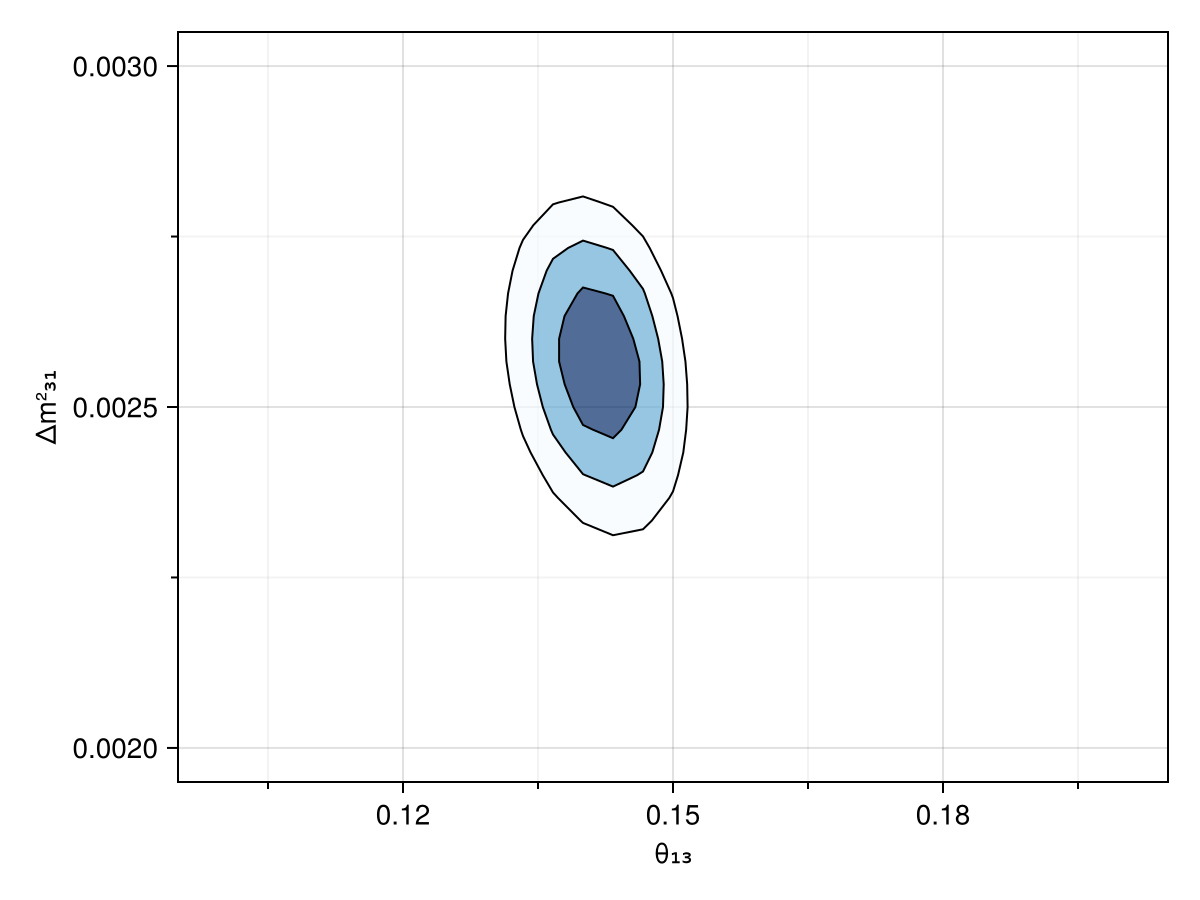

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_thetadelta_NND_prof.png", img)
